In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import re
import gensim
from keras.models import Sequential,load_model
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, concatenate
#from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

In [2]:
# Load data
#data=open("hate-by-Kabada.csv", errors='ignore')
#df = pd.read_csv('hate-by-Kabada.csv')
#,count,hate_speech,offensive_language,neither,class,tweet
# Preprocess data
path = "C:\\Users\\Moti\Desktop\\Intent\\Meliha Research\\maliha_dataset_researchs.xlsx"
data=pd.read_excel(path, names=['Text','Intent'])
data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(10561, 2)


,Text,Intent
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question
1,Meeti ree kuta 28ffaa,Question
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive


<AxesSubplot:xlabel='Intent', ylabel='count'>

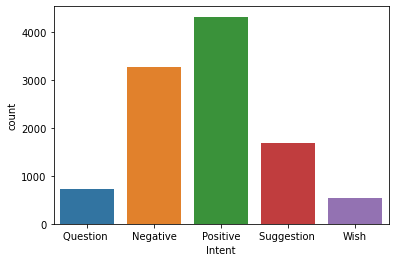

In [3]:
sns.countplot(x='Intent', data=data)

In [4]:
data["Intent"].value_counts()
#print(len('Gosa_miira'))
#print(len('jechoota'))

Positive       4320
Negative       3271
Suggestion     1686
Question        736
Wish            546
Name: Intent, dtype: int64

In [5]:
data['Text'].apply(lambda x: x.lower())

0        kiyyoo dirama oso  eguti jirun na darbe tari a...
1                                    meeti ree kuta 28ffaa
2             kutaa digdami sadetaffa isiin egee dadhabee.
3        kutaa digdami sadetaffaa fiidagaa maali nuuraa...
4        nuuf jabbadhakaa warii akka kotti kiyyoo jaala...
                               ...                        
10556    isheenis namoota dogoggoraa waliin lafa dogogg...
10557    vidiyichis battalumatti qoodamuun marsariitiiw...
10558    gochiwwan qaamaa warraabbicha irratti ture bah...
10559              jechi gurbbichaa altokkicha dhagahame. 
10560                           viidiyoo waraabaa jirtaa? 
Name: Text, Length: 10561, dtype: object

In [6]:
y = data['Intent']

In [11]:
tokenizer=Tokenizer(num_words=20000,split=" ")
tokenizer.fit_on_texts(data['Text'].values)
x=tokenizer.texts_to_sequences(data['Text'].values)
x=pad_sequences(x)
x[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  200, 3024, 3025, 6010, 6011,
          37,  192, 6012, 6013,  140,  325, 6014, 6015],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 5622,  438, 3332, 6016],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  162, 3333, 6017,  326, 6018,  422],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,  

In [12]:
y=pd.get_dummies(data['Intent']).values
[print(data['Intent'][i],y[i]) for i in range(0,5)]

Question  [0 0 1 0 0]
Question  [0 0 1 0 0]
Negative [1 0 0 0 0]
Negative [1 0 0 0 0]
Positive [0 1 0 0 0]


[None, None, None, None, None]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=100)

In [18]:
model = Sequential()
model.add(Embedding(12000, 64, input_length=x.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(150, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.3)))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
model.add(Dense(5, activation = 'softmax'))

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 41, 64)            768000    
                                                                 
 dropout_1 (Dropout)         (None, 41, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 41, 300)          258000    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 1,347,805
Trainable params: 1,347,805
No

In [21]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64,validation_split=0.1)

Epoch 1/30
134/134 [==============================] - 116s 626ms/step - loss: 1.2005 - accuracy: 0.5092 - val_loss: 0.8556 - val_accuracy: 0.6730
Epoch 2/30
134/134 [==============================] - 177s 1s/step - loss: 0.5539 - accuracy: 0.8005 - val_loss: 0.5229 - val_accuracy: 0.8160
Epoch 3/30
134/134 [==============================] - 211s 2s/step - loss: 0.2946 - accuracy: 0.9005 - val_loss: 0.4434 - val_accuracy: 0.8507
Epoch 4/30
134/134 [==============================] - 213s 2s/step - loss: 0.1987 - accuracy: 0.9288 - val_loss: 0.4330 - val_accuracy: 0.8644
Epoch 5/30
134/134 [==============================] - 160s 1s/step - loss: 0.1540 - accuracy: 0.9452 - val_loss: 0.4204 - val_accuracy: 0.8633
Epoch 6/30
134/134 [==============================] - 183s 1s/step - loss: 0.1281 - accuracy: 0.9505 - val_loss: 0.4214 - val_accuracy: 0.8644
Epoch 7/30
134/134 [==============================] - 206s 2s/step - loss: 0.1091 - accuracy: 0.9542 - val_loss: 0.4223 - val_accuracy: 0.8

In [22]:
import matplotlib.pyplot as plt

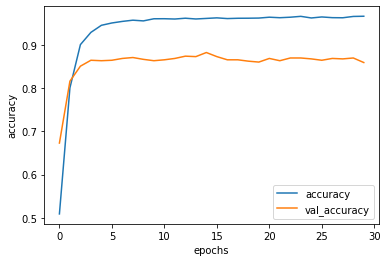

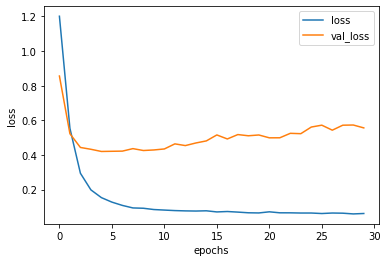

In [23]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [46]:
classes = ['Positive','Negative','Question','Suggestion','Wish']

In [47]:
# Make predictions with your BiLSTM model
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)  # Assuming you have a multi-class classification problem

# Convert true labels to classes (if they are in one-hot encoded format)
y_true_classes = y_test.argmax(axis=1)



34/34 [==============================] - 3s 80ms/step


In [48]:
# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names = classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Positive       0.88      0.89      0.89       338
    Negative       0.88      0.85      0.87       426
    Question       0.87      0.90      0.88        79
  Suggestion       0.71      0.77      0.74       159
        Wish       0.84      0.78      0.81        55

    accuracy                           0.85      1057
   macro avg       0.84      0.84      0.84      1057
weighted avg       0.85      0.85      0.85      1057



In [49]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [50]:
predictions = model.predict(x_test)

34/34 [==============================] - 3s 74ms/step


In [51]:
# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names = classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Positive       0.88      0.89      0.89       338
    Negative       0.88      0.85      0.87       426
    Question       0.87      0.90      0.88        79
  Suggestion       0.71      0.77      0.74       159
        Wish       0.84      0.78      0.81        55

    accuracy                           0.85      1057
   macro avg       0.84      0.84      0.84      1057
weighted avg       0.85      0.85      0.85      1057



In [52]:
cm=metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [53]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [54]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [55]:
print(FP)
print(FN)
print(TP)
print(TN)

[39. 49. 11. 50.  8.]
[38. 63.  8. 36. 12.]
[300. 363.  71. 123.  43.]
[680. 582. 967. 848. 994.]


In [56]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision+recall)

In [57]:
print("recall  ", recall)
print("precision",precision)
print("f1_score",f1_score)

recall   [0.88757396 0.85211268 0.89873418 0.77358491 0.78181818]
precision [0.88495575 0.88106796 0.86585366 0.71098266 0.84313725]
f1_score [0.88626292 0.86634845 0.88198758 0.74096386 0.81132075]


In [58]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [59]:
accuracy(cm)

0.8514664143803217

In [60]:
new_intent = ['Kutaa digdami sadetaffa isiin egee dadhabee.']
seq = tokenizer.texts_to_sequences(new_intent)
padded = pad_sequences(seq, maxlen=6000)
pred = model.predict(padded)
classes = ['Positive','Negative','Question','Suggestion','Wish']
#Intent = ['Question', 'Negative', 'Positive', 'Suggestion', 'Wish']
print(pred, classes[np.argmax(pred)])

1/1 [==============================] - 4s 4s/step
[[8.9403708e-05 9.9966264e-01 4.5431210e-05 1.7684742e-04 2.5701140e-05]] Negative
